# Import Modules


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
import pickle

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean_telecom_dataframe import Telecom
from plot_telecom_dataframe import TelecomPlotter

plot = TelecomPlotter()
cleaner = Telecom()

## Read CSV Data

In [8]:
telecom_cleaned_df = pd.read_csv("../data/telecom_cleaned_data.csv")

In [9]:
#select relevant columns to analyze user engagment
telecom_engagement_df = telecom_cleaned_df[['MSISDN/Number','Bearer Id', 'Dur (ms)', 'Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
telecom_engagement_df

,MSISDN/Number,Bearer Id,Dur (ms),Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
0,33664962239,-9223372036854775808,1.823653e+09,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,33681854413,-9223372036854775808,1.365104e+09,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,33760627129,-9223372036854775808,1.361763e+09,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,33699795932,-9223372036854775808,1.089009e+09,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0
4,33665368271,-9223372036854775808,1.035262e+09,118487293.0,1624991.0,4906872.0,2090979.0,9120760.0,31212766.0,58881157.0,814303325.0
...,...,...,...,...,...,...,...,...,...,...,...
138066,33645655643,-9223372036854775808,1.135452e+08,922173944.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0
138067,33650688697,7277825670196679680,8.123076e+07,631804110.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0
138068,33663449963,7349883264234609664,9.797070e+07,705783925.0,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0
138069,33621890103,-9223372036854775808,9.824953e+07,627698629.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0


In [10]:
# Group the dataframe with Number(User)
telecom_engagement_df = telecom_engagement_df.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
telecom_engagement_df = telecom_engagement_df.rename(
    columns={'Bearer Id': 'number of xDR Sessions'})
telecom_engagement_df

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33601001722,1,116720140.0,8.786906e+08
33601001754,1,181230963.0,1.568596e+08
33601007832,1,49878024.0,4.223207e+08
33601008617,2,37104453.0,1.457411e+09
33601010682,2,253983077.0,6.152172e+08
...,...,...,...
33789960306,1,157069852.0,7.102876e+08
33789967113,1,160461578.0,2.081231e+08
33789996170,1,8810688.0,7.146416e+08


# Top 10 Numbers with highest number of xDR Sessions

In [11]:
telecom_engagement_df.sort_values('number of xDR Sessions',ascending=False).head(10)


,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33626320676,18,8.791937e+09,7.971167e+09
33625779332,17,1.855376e+10,8.499621e+09
33614892860,17,9.966906e+09,8.846226e+09
33659725664,16,4.035436e+09,7.705863e+09
33675877202,15,4.865954e+09,7.891111e+09
33760536639,15,9.279442e+09,8.514774e+09
33667163239,13,8.744922e+09,5.618394e+09
33604515716,12,5.207995e+09,5.487855e+09
33603127838,12,6.287767e+09,4.976195e+09


# Top 10 Numbers with highest number of Duration


In [12]:
telecom_engagement_df.sort_values('Dur (ms)',ascending=False).head(10)


,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33625779332,17,1.855376e+10,8.499621e+09
33614892860,17,9.966906e+09,8.846226e+09
33760536639,15,9.279442e+09,8.514774e+09
33626320676,18,8.791937e+09,7.971167e+09
33667163239,13,8.744922e+09,5.618394e+09
33603127838,12,6.287767e+09,4.976195e+09
33667456716,6,5.649885e+09,2.600522e+09
33604515716,12,5.207995e+09,5.487855e+09
33698792269,11,5.169134e+09,6.540899e+09


# Top 10 Numbers with highest number of total Data Volume


In [13]:
telecom_engagement_df.sort_values('Total Data Volume (Bytes)',ascending=False).head(10)


,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,17,9.966906e+09,8.846226e+09
33760536639,15,9.279442e+09,8.514774e+09
33625779332,17,1.855376e+10,8.499621e+09
33626320676,18,8.791937e+09,7.971167e+09
33675877202,15,4.865954e+09,7.891111e+09
33659725664,16,4.035436e+09,7.705863e+09
33666464084,11,4.536764e+09,7.308501e+09
33664712899,11,2.927790e+09,6.872018e+09
33698792269,11,5.169134e+09,6.540899e+09


# Dataframe Normalzation

In [14]:
selected_metrics = telecom_engagement_df
scale_data = StandardScaler().fit_transform(selected_metrics)
scale_data

array([[-0.49203077, -0.15370369,  0.3859319 ],
       [-0.49203077,  0.20223377, -1.09205693],
       [-0.49203077, -0.52250403, -0.54851071],
       ...,
       [-0.49203077, -0.74909242,  0.05003262],
       [-0.49203077, -0.01980251, -0.42977986],
       [-0.49203077,  0.59838496, -0.19230338]])

In [15]:
normalized_data = normalize(scale_data)
normalized_data

array([[-0.76409062, -0.23869147,  0.59932622],
       [-0.40505194,  0.16648386, -0.89900837],
       [-0.54469765, -0.57843276, -0.60722319],
       ...,
       [-0.5481452 , -0.83452384,  0.05573866],
       [-0.75279737, -0.03029746, -0.6575547 ],
       [-0.61641759,  0.74965842, -0.24091824]])

Text(0.5, 1.0, 'Normalized data')

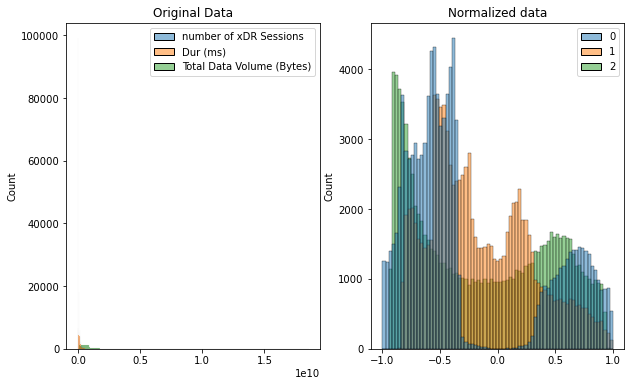

In [16]:
fig, ax=plt.subplots(1,2, figsize=(10, 6))
sns.histplot(selected_metrics, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

# K-Means Clustering 

In [17]:
#We choose 3 as the number of clusters needed 
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

In [18]:
clustered_telecom_engagement_df = telecom_engagement_df.copy()
clustered_telecom_engagement_df.insert(0, 'Cluster', y_kmeans)
clustered_telecom_engagement_df

,Cluster,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,,
33601001722,2,1,116720140.0,8.786906e+08
33601001754,0,1,181230963.0,1.568596e+08
33601007832,0,1,49878024.0,4.223207e+08
33601008617,1,2,37104453.0,1.457411e+09
33601010682,1,2,253983077.0,6.152172e+08
...,...,...,...,...
33789960306,2,1,157069852.0,7.102876e+08
33789967113,0,1,160461578.0,2.081231e+08
33789996170,2,1,8810688.0,7.146416e+08


In [19]:
clustered_telecom_engagement_df['Cluster'].value_counts()


0    44403
2    27447
1    27265
Name: Cluster, dtype: int64

# Minimum , Maximum , Average and Total of Clusters

In [20]:
min_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'min','Dur (ms)': 'min','Total Data Volume (Bytes)': 'min'})
min_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1,7189000.0,33249009.0
1,1,18235797.0,118487293.0
2,1,7142988.0,545365335.0


<AxesSubplot:ylabel='number of xDR Sessions'>

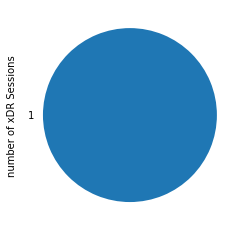

In [21]:
min_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Dur (ms)'>

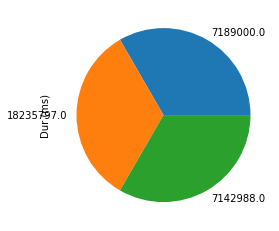

In [22]:
min_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')


<AxesSubplot:>

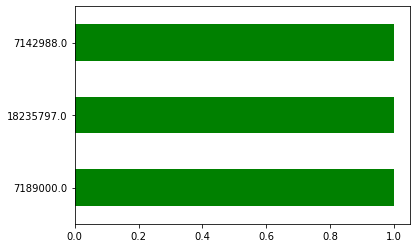

In [24]:
min_of_clusters['Dur (ms)'].value_counts().plot(kind='barh',color='green')


<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

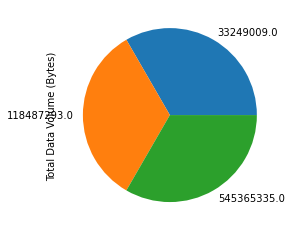

In [25]:
min_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

<AxesSubplot:>

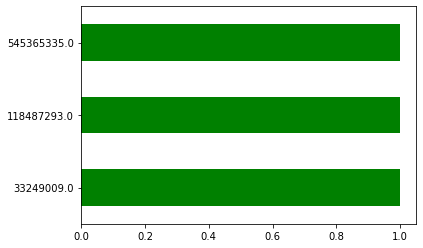

In [26]:
min_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='barh',color='green')

In [27]:
max_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'max','Dur (ms)': 'max','Total Data Volume (Bytes)': 'max'})
max_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,2,7.804715e+08,7.031826e+08
1,18,1.855376e+10,8.846226e+09
2,1,3.327750e+08,9.507607e+08


<AxesSubplot:ylabel='number of xDR Sessions'>

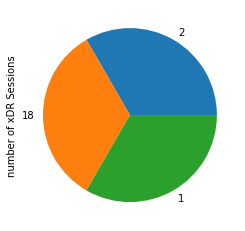

In [28]:
max_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')


<AxesSubplot:>

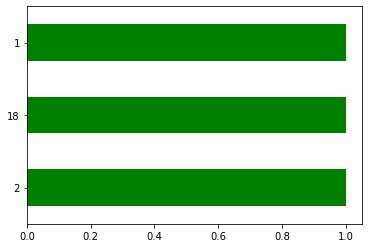

In [29]:
max_of_clusters['number of xDR Sessions'].value_counts().plot(kind='barh',color='green')

<AxesSubplot:ylabel='Dur (ms)'>

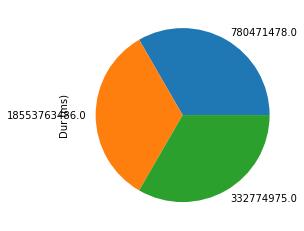

In [30]:
max_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')


<AxesSubplot:>

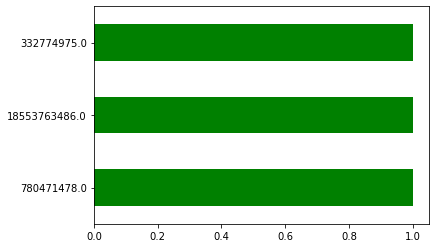

In [31]:
max_of_clusters['Dur (ms)'].value_counts().plot(kind='barh',color='green')

<AxesSubplot:>

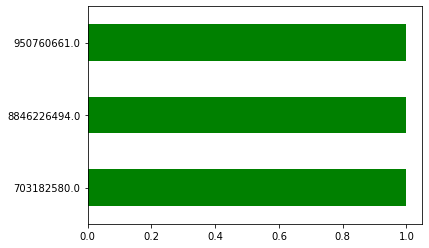

In [32]:
max_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='barh',color='green')

In [33]:
mean_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'mean','Dur (ms)': 'mean','Total Data Volume (Bytes)': 'mean'})
mean_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1.004865,1.050958e+08,3.342595e+08
1,2.420869,2.618990e+08,1.205571e+09
2,1.000000,9.190706e+07,7.540998e+08


<AxesSubplot:ylabel='number of xDR Sessions'>

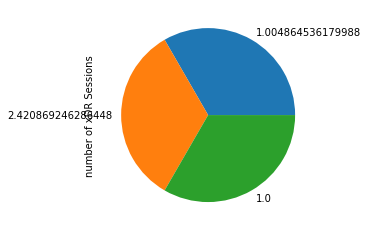

In [34]:
mean_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Dur (ms)'>

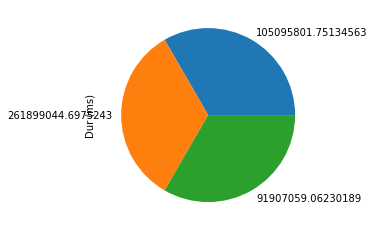

In [35]:
mean_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

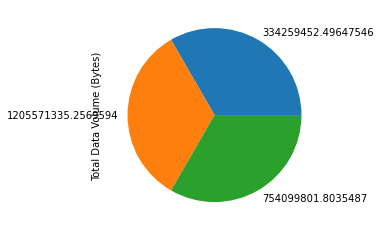

In [36]:
mean_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')


In [37]:
total_of_clusters = clustered_telecom_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'sum','Dur (ms)': 'sum','Total Data Volume (Bytes)': 'sum'})
total_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,44619,4.666569e+12,1.484212e+13
1,66005,7.140677e+12,3.286990e+13
2,27447,2.522573e+12,2.069778e+13


<AxesSubplot:ylabel='number of xDR Sessions'>

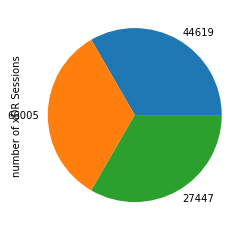

In [38]:
total_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')


<AxesSubplot:>

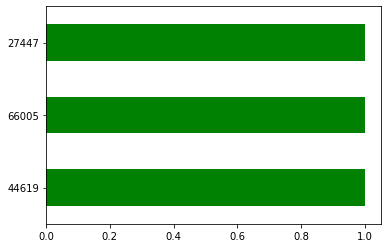

In [39]:
from turtle import color


total_of_clusters['number of xDR Sessions'].value_counts().plot(kind='barh',color='green')


<AxesSubplot:ylabel='Dur (ms)'>

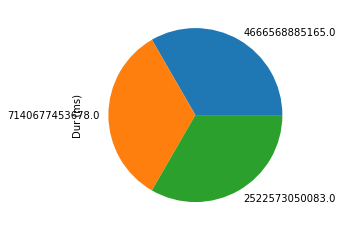

In [40]:
total_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

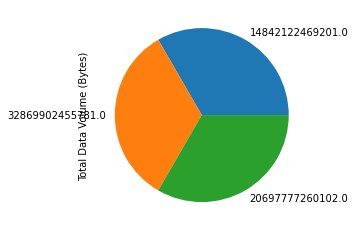

In [41]:
total_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')


<AxesSubplot:>

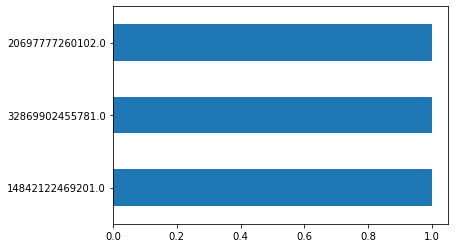

In [42]:
total_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='barh')
